In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.metrics import r2_score, make_scorer
from sklearn.linear_model import LinearRegression, Ridge, Lasso, BayesianRidge, HuberRegressor 
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesClassifier
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('hcj_data.csv', names=['REs', 'PrNd', 'La', 'Ce', 'Fe', 'Co', 'TM', 'B', 'PrNd_p', 'La_p', 'Ce_p', 'Hcj'])
X = df.iloc[:, :-1].values
y = df['Hcj'].values
X_1 = preprocessing.scale(X)
y_1 = preprocessing.scale(y)

pca = PCA(n_components=5)
X_2 = pca.fit_transform(X)

poly = PolynomialFeatures(degree=2, interaction_only=True)
X_3 = poly.fit_transform(X_1)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_1, y_1, test_size=0.2, random_state=12)

def test_model(clf, x=X_train, y=y_train, randn=27):            
    cv = KFold(n_splits=6,shuffle=True, random_state=randn)  
    r2 = make_scorer(r2_score)  
    r2_val_score = cross_val_score(clf, x, y, cv=cv,scoring=r2, n_jobs=-1)    #'neg_mean_absolute_error'
    scores=r2_val_score.mean()
    stds=r2_val_score.std()
    return np.array([scores, stds]) 

In [34]:
results = {}

clf = LinearRegression()  
results["Linear"]=test_model(clf)  
      
clf = Ridge()  
results["Ridge"]=test_model(clf)  
      
clf = BayesianRidge()  
results["Bayesian Ridge"]=test_model(clf)  
      
clf = HuberRegressor()  
results["Hubber"]=test_model(clf)  
      
clf = Lasso(alpha=1e-4)  
results["Lasso"]=test_model(clf)  
      
clf = BaggingRegressor()  
results["Bagging"]=test_model(clf)  
      
clf = RandomForestRegressor()  
results["RandomForest"]=test_model(clf)  
      
clf = AdaBoostRegressor()  
results["AdaBoost"]=test_model(clf)  
      
clf = SVR()  
results["SVM RBF"]=test_model(clf)  
      
clf = SVR(kernel="linear")  
results["SVM Linear"]=test_model(clf)  

clf = DecisionTreeRegressor()
results["DecisionTree"]=test_model(clf) 

clf = GradientBoostingRegressor()
results["GradientBoosting"]=test_model(clf)


,R Square Score,Std
SVM Linear,0.684587,0.050324
Hubber,0.689774,0.038283
Lasso,0.697477,0.036264
Bayesian Ridge,0.697688,0.035927
Ridge,0.697795,0.035975
Linear,0.699204,0.035143
AdaBoost,0.766530,0.036906
DecisionTree,0.776156,0.021244
SVM RBF,0.785768,0.026007
Bagging,0.836408,0.020984


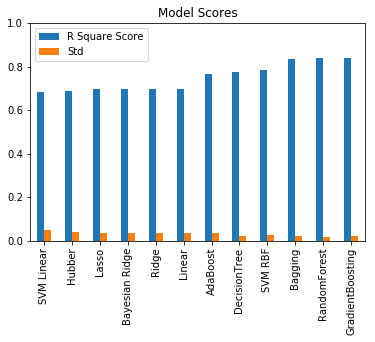

In [35]:
results1 = pd.DataFrame.from_dict(results,orient='index') 
results1.columns=['R Square Score', 'Std'] 
results1 = results1.sort_values(by='R Square Score')
#results1['Std'] = results1['Std'] * 10
results1.plot(kind="bar",title="Model Scores") 
axes = plt.gca()  
axes.set_ylim([0,1])
results1

In [36]:
results1.to_csv('model_slect.csv')

In [4]:
clf = GradientBoostingRegressor()
cv = KFold(n_splits=6,shuffle=True, random_state=38)  
r2 = make_scorer(r2_score)  
r2_val_score = cross_val_score(clf, X_train, y_train, cv=cv, scoring='r2',n_jobs=-1) 
print(r2_val_score)
print(r2_val_score.mean())
print(r2_val_score.std())

[ 0.84168195  0.88303146  0.74117743  0.85949254  0.85606722  0.76838523]
0.824972639499
0.0516918684576


In [16]:
for i in range(0, 51):
    clf = GradientBoostingRegressor(random_state=38)
    socre = test_model(clf, randn=i)
    print(i, socre)

0 [ 0.82918816  0.06375827]
1 [ 0.82417433  0.04694984]
2 [ 0.8035708   0.06152806]
3 [ 0.81483205  0.03860419]
4 [ 0.82885042  0.04300764]
5 [ 0.82256186  0.07756167]
6 [ 0.82241753  0.03314949]
7 [ 0.82864269  0.05812661]
8 [ 0.80052692  0.06683712]
9 [ 0.8140187   0.03797935]
10 [ 0.83403874  0.05646837]
11 [ 0.82504706  0.04482744]
12 [ 0.80870205  0.06588701]
13 [ 0.7973903  0.0867262]
14 [ 0.8303175   0.04361441]
15 [ 0.81185332  0.03489053]
16 [ 0.80775899  0.04574949]
17 [ 0.81233693  0.06707377]
18 [ 0.81918167  0.04866067]
19 [ 0.80421566  0.07605012]
20 [ 0.81435429  0.06271554]
21 [ 0.80283709  0.0385768 ]
22 [ 0.81279138  0.05457233]
23 [ 0.81631012  0.05358813]
24 [ 0.80114395  0.08773899]
25 [ 0.82992004  0.03304734]
26 [ 0.78072717  0.0562803 ]
27 [ 0.8300834   0.04859513]
28 [ 0.82368351  0.07716074]
29 [ 0.79570854  0.07631971]
30 [ 0.8199677   0.06600977]
31 [ 0.81438791  0.08743084]
32 [ 0.82350509  0.03074824]
33 [ 0.78746889  0.07317003]
34 [ 0.81880325  0.0448798